# Matemática para Ciencia de los Datos
# Trabajo Práctico 3

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 15 de Mayo del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. **Marco Ferraro**


---

**Pregunta 1**



Se puede demostrar que para los vectores generadores de un subespacio $E=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right\}$ , con $V=\left[\vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right]$,con $\vec{v}_{m}\in\mathbb{R}^{n}$ si son ortonormales, la ecuación de la proyección de un vector $\vec{u}\in\mathbb{R}^{n}$ originalmente dada por:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$$

se puede reescribir como: 

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,V^{T}\vec{u}$$

con $V\in\mathbb{R}^{n\times m}$.









**1.1 (25 puntos)**

Utilizando numpy, proponga una matriz ortonormal de dimensiones 3x3, para ello utilice una fuente como "Proceso de ortonormalización de  Gram - Schmidt" (https://blog.nekomath.com/algebra-lineal-i-proceso-de-gram-schmidt/) para producir una matriz ortonormal a partir de una matriz que no es ni ortonormal ni ortogonal. 

Finalmente muestre en numpy que su matriz resultante es ortonormal ($V$).



Matriz original: 

\begin{pmatrix}
3 & 1\\
0 & 2 
\end{pmatrix}


Matriz ortonormalizada: 

\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}

In [28]:
import numpy as np
import math


A = np.matrix([[1., 0], [0, 1]])


np.matmul(A.T, A)

matrix([[1., 0.],
        [0., 1.]])

**1.2 (15 puntos)**

Proponga un vector $\vec{u}$ y programe en numpy las operaciones algebraicas siguientes (tome $V$ del paso anterior).

$V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$

y,

$V\,V^{T}\vec{u}$


In [29]:
from numpy.linalg import inv

b = [4, 9]

inv_mult = np.matmul(A.T, A)
inv_mult = inv(inv_mult)

proyec_1 = np.matmul(np.matmul(np.matmul(A, inv_mult), A.T), b)
proyec_1

matrix([[4., 9.]])

In [30]:
proyec_2 = np.matmul(np.matmul(A, A.T), b)

**1.3 (10 puntos)**

Programe en python para calcular el error de proyección obtenido para los casos del punto **1.2**.

In [31]:
from numpy import linalg as LA

def proyection_error(v, u):
    return abs(LA.norm(v) - LA.norm(u))


proyection_error(proyec_1, proyec_2)

0.0

---

**Pregunta 2 (10 puntos)**


Programe en python la función calculeDet2, que recibe como parámetro una matriz cuadrada de dimensiones 2x2, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función tipo det para calcularla. Pruébela con dos matrices que Usted proponga.

def calculeDet2( M ):





In [32]:
def calculeDet2(M):
    diagonalUno = M[0][0] * M[1][1]
    diagonalDos = M[0][1] * M[1][0]

    return diagonalUno - diagonalDos

In [33]:
calculeDet2([[5, -3], [6, 4]])

38

---

**Pregunta 3 (10 puntos)**


Programe en python la función calculeDet3, que recibe como parámetro una matriz cuadrada de dimensiones 3x3, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función de numpy tipo det para calcularla (sí puede usar función que programó en la **Pregunta 2**). Pruébela con dos matrices que Usted proponga.

def calculeDet3( M ):






In [34]:
def calculeDet3(M):
    comp1 = M[0][0] * calculeDet2([[M[1][1], M[1][2]], [M[2][1], M[2][2]]])
    comp2 = -1 * M[0][1] * calculeDet2([[M[1][0], M[1][2]], [M[2][0], M[2][2]]])
    comp3 = M[0][2] * calculeDet2([[M[1][0], M[1][1]], [M[2][0], M[2][1]]])

    return comp1 + comp2 + comp3



In [35]:
A = [[-2, 4, 5], [6, 7, -3], [3, 0, 2]]
B = [[1, 2, 1], [1, -3, 4], [-1, 0, -2]]

In [36]:
calculeDet3(A)

-217

In [37]:
np.linalg.det(A)

-217.00000000000003

In [38]:
calculeDet3(B)

-1

In [39]:
np.linalg.det(B)

-1.0000000000000009

---

**Pregunta 4 (15 puntos)**

Se tiene que:

$$\textrm{det}\left(A\,B\right)=\textrm{det}\left(A\right)\,\textrm{det}\left(B\right)$$

Proponga dos matrices de 4x4 ( $A$ e $B$) y programando en numpy muestre esta igualdad (puede usar de numpy las funciones det y la de multiplicar matrices).






In [40]:
A = [[4, 5, -2, 4], [0, -4, 2, 8], [9, -9, 3, 11], [1, 3, 9, 1]]
B = [[0, -9, -3, 1], [8, 6, -3, 5], [5, 5, 1, -4], [-7, 3, -3, -4]]


print(f"det(AB) = {np.linalg.det(np.matmul(A, B)): .2f}")
print(f"det(A)det(B) = {(np.linalg.det(A)) * (np.linalg.det(B)): .2f}")


det(AB) =  24876096.00
det(A)det(B) =  24876096.00


---

**Pregunta 5 (15 puntos)**


Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Muestre cuántas filas por cuántas columnas tiene el conjunto de datos.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con todas las columnas menos la última de la derecha.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



In [41]:
import pandas as pd

df = pd.read_csv("Dataset_usar.csv", sep=';')

df

,bias,Length,Diameter,Height,Whole,Shucked,Sex_Female,Sex_Masculine,Shellweight
0,1,0.186567,0.155963,0.195652,0.011688,0.333333,0,1,0.0100
1,1,0.813433,0.761468,0.826087,0.433327,0.333333,1,0,0.4350
2,1,0.410448,0.376147,0.369565,0.074022,0.333333,1,0,0.0680
3,1,0.537313,0.504587,0.500000,0.143085,0.333333,1,0,0.0960
4,1,0.507463,0.495413,0.565217,0.146981,0.333333,0,1,0.1440
...,...,...,...,...,...,...,...,...,...
993,1,0.261194,0.247706,0.217391,0.026386,0.333333,1,0,0.0245
994,1,0.514925,0.495413,0.456522,0.101470,0.333333,0,1,0.1135
995,1,0.432836,0.440367,0.369565,0.087834,0.333333,1,0,0.0800
996,1,0.574627,0.596330,0.543478,0.170002,0.333333,0,1,0.1450


In [42]:
df.shape

(998, 9)

In [43]:
b = df['Shellweight']

b = b.to_numpy()
b.shape

(998,)

In [44]:
A = df.drop(df.columns[-1], axis=1)

A = A.to_numpy()
A.shape

(998, 8)

In [45]:

weight =  np.linalg.inv(np.matmul(A.T, A))
weight = np.matmul(np.matmul(weight, A.T), b)

b_predict = np.matmul(A, weight)

b_predict.shape

(998,)

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def plot_vectors(a, b, x_lim=30, y_lim=30, label_a='vector a', label_b='vector b'):
  # Create a plot
  plt.figure()

  # Plot the vectors as arrows
  plt.arrow(0, 0, a[0], a[1], head_width=0.05, head_length=0.05, color='b', label=label_a)
  plt.arrow(0, 0, b[0], b[1], head_width=0.05, head_length=0.05, color='r', label=label_b)

   

  # Set the x and y limits of the plot
  plt.xlim(-1 * x_lim, x_lim)
  plt.ylim(-1 * y_lim, y_lim)

  # Add a grid and legend
  plt.grid()
  plt.legend()

  # Show the plot
  plt.show()

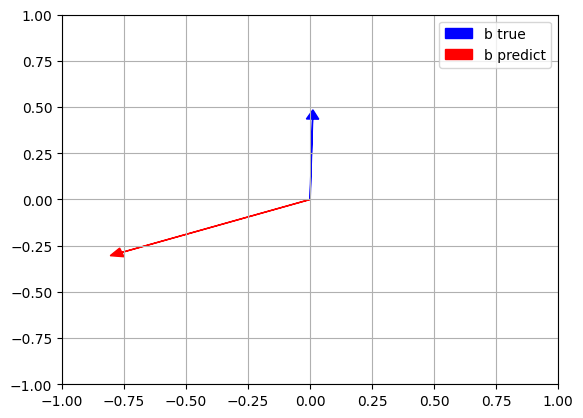

In [52]:
plot_vectors(b, b_predict, x_lim=1, y_lim=1, label_a="b true", label_b="b predict")